## Logistic Regression Example

***

<a id='h1_cell'></a>
# Ingesting data


This example uses the [Default](https://r-data.pmagunia.com/dataset/r-dataset-package-islr-default) dataset, which contains information about people and whether they defaulted on their credit card debt. More specifically, the dataset contains four features for each person:
- Did the person default? 
- Is the person a student? 
- What is their balance? 
- What is their annual income? 

You can build a classification model based on the last three parameters. This model can then be used to predict if a person is likely to default on their credit card debt.

To begin, load the data into VerticaPy:

```python
import verticapy as vp
data=vp.read_csv('Data/default_data.csv')
```

In [1]:
import verticapy as vp
data=vp.read_csv('/project/data/DataScienceEssentials/default_data.csv')

Examine the data:

,123serialInt,010defaultBoolean,010studentBoolean,123credit_balanceFloat,123incomeFloat
1,1,❌,❌,729.5264952,44361.62507
2,2,❌,✅,817.1804066,12106.1347
3,3,❌,❌,1073.549164,31767.13895
4,4,❌,❌,529.2506047,35704.49394
5,5,❌,❌,785.6558829,38463.49588
6,6,❌,✅,919.5885305,7491.558572
7,7,❌,❌,825.5133305,24905.22658
8,8,❌,✅,808.6675043,17600.45134
9,9,❌,❌,1161.057854,37468.52929
10,10,❌,❌,0.0,29275.26829

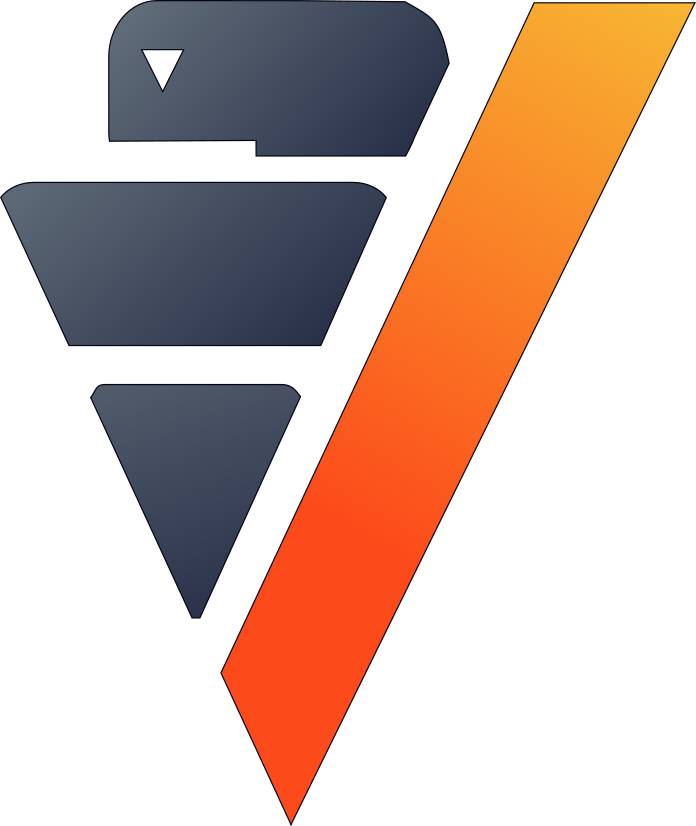

In [2]:
data

The `serial` column is just the row number, so it can be dropped:
```python
data.drop('serial')
```

,010defaultBoolean,010studentBoolean,123credit_balanceFloat,123incomeFloat
1,❌,❌,729.5264952,44361.62507
2,❌,✅,817.1804066,12106.1347
3,❌,❌,1073.549164,31767.13895
4,❌,❌,529.2506047,35704.49394
5,❌,❌,785.6558829,38463.49588
6,❌,✅,919.5885305,7491.558572
7,❌,❌,825.5133305,24905.22658
8,❌,✅,808.6675043,17600.45134
9,❌,❌,1161.057854,37468.52929
10,❌,❌,0.0,29275.26829

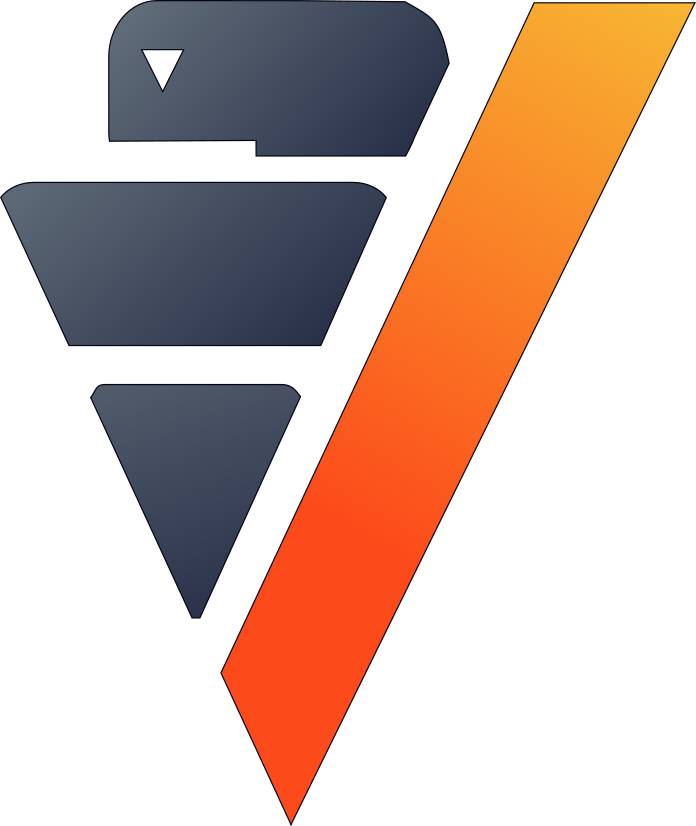

In [3]:
data.drop('serial')

The next step is to find and handle missing values. You can find missing data with `describe()`, which produces a summary of the dataset:

```python
data.describe()
```

,count,mean,std,min,approx_25%,approx_50%,approx_75%,max
"""default""",7618,0.0336046206353373,0.180221013322029,0.0,0.0,0.0,0.0,1.0
"""student""",7618,0.293646626411131,0.455461871265586,0.0,0.0,0.0,1.0,1.0
"""credit_balance""",7618,834.003369570169,482.06106444258,0.0,481.06857144,819.768457383333,1164.03911975,2502.684931
"""income""",7618,33495.347920566,13302.1082548578,771.9677294,21269.7813009091,34558.1724415385,43731.6383822222,73554.2335

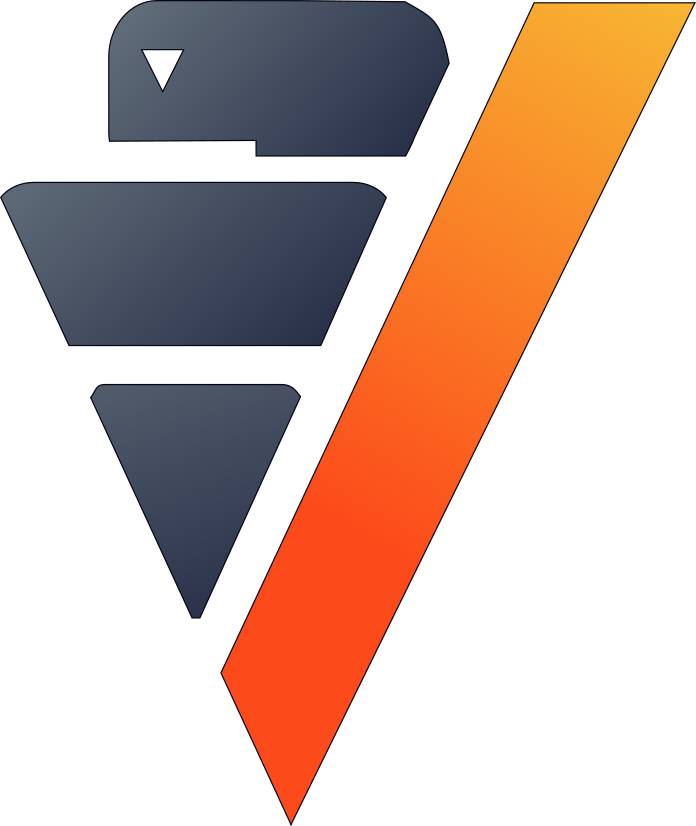

In [4]:
data.describe()

The `count` shows that all columns (`default`, `student`, `credit_balance`, `income`) have the same number of values, so there are no missing values in the dataset.

<a id='h2_cell'></a>
# Data Exploration

A graph is often useful for identifying trends. Create a scatter plot for income, balance, and the `default` category:

```python
data.scatter(['credit_balance','income'],catcol='default')
```

<AxesSubplot:xlabel='"credit_balance"', ylabel='"income"'>

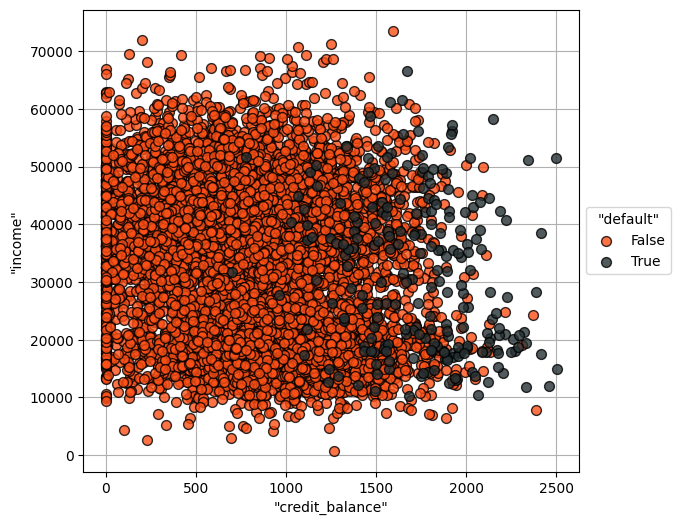

In [5]:
data.scatter(['credit_balance','income'],catcol='default')

An obvious correlation is higher balances and defaults, but there is also a less obvious correlation with income. This correlation is easier to see with some other graphs:

```python
data["credit_balance"].boxplot(by = "default")

data["income"].boxplot(by = "default")
```

<AxesSubplot:xlabel='"default"', ylabel='"income"'>

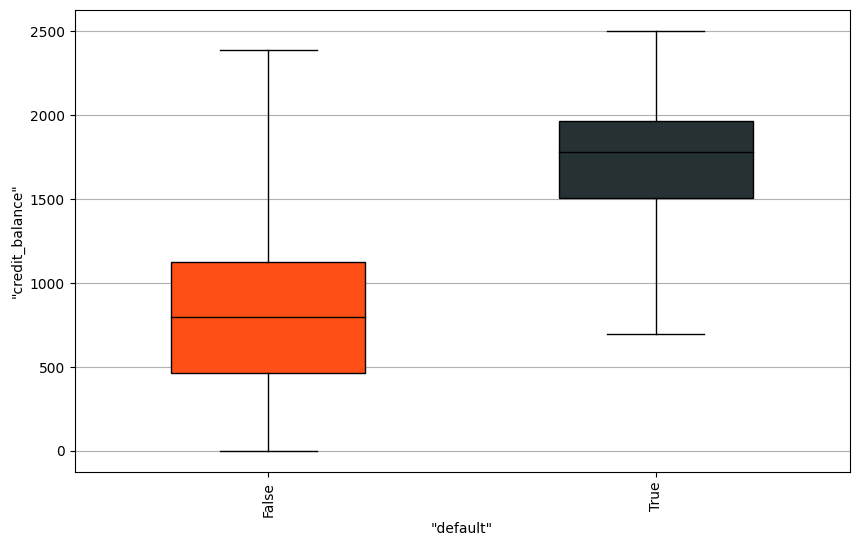

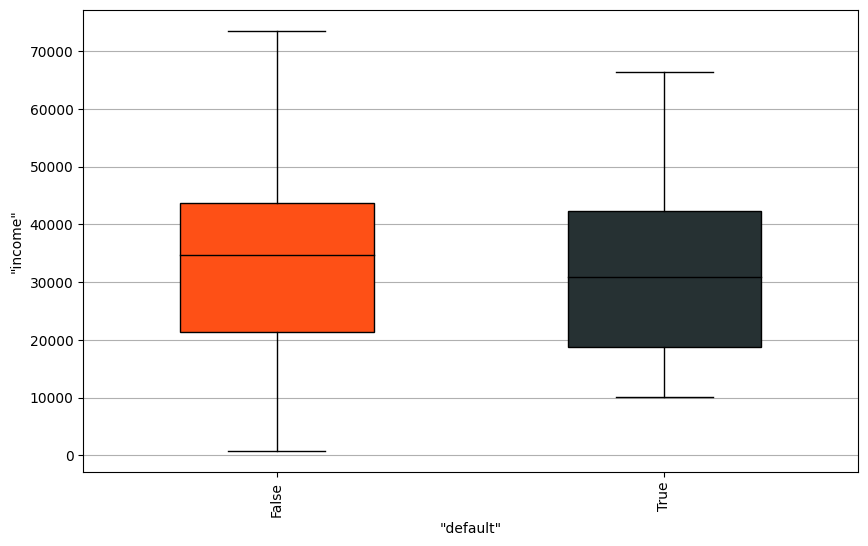

In [6]:
data["credit_balance"].boxplot(by = "default")

data["income"].boxplot(by = "default")

<AxesSubplot:xlabel='Density', ylabel='"default"'>

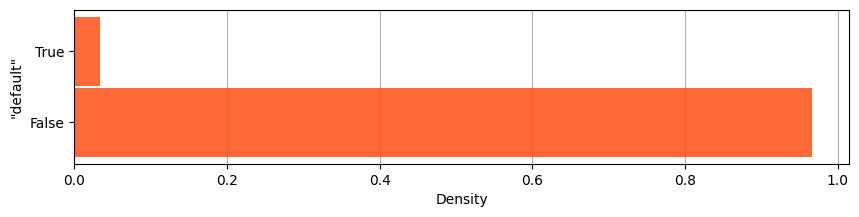

In [7]:
data.bar(['default'])

<AxesSubplot:xlabel='Density', ylabel='"student"'>

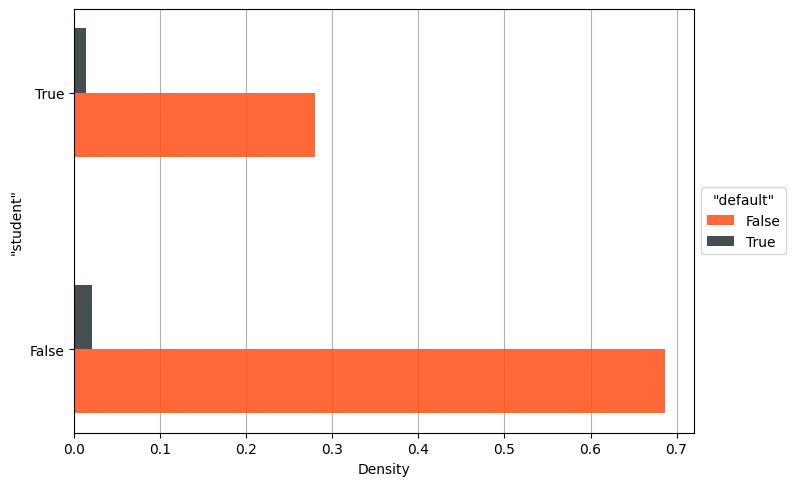

In [8]:
data.bar(['student','default'])

***

<a id='h3_cell'></a>
# Applying logistic regression

Import the `LogisticRegression` library and create a logistic regression model object:

```python
from verticapy.learn.linear_model import LogisticRegression
model = LogisticRegression("public.LR_default")
```

Fit the model with the data:

```python
model.fit(data, ["credit_balance", "income","student"], "default")
```


In [9]:
from verticapy.learn.linear_model import LogisticRegression
model = LogisticRegression("public.LR_default")

In [10]:
model.fit(data, ["credit_balance", "income","student"], "default")



details
  predictor   |coefficient|std_err | z_value |p_value 
--------------+-----------+--------+---------+--------
  Intercept   | -11.15139 | 0.57746|-19.31113| 0.00000
credit_balance|  0.00587  | 0.00027|21.60061 | 0.00000
    income    |  0.00001  | 0.00001| 0.63721 | 0.52399
   student    | -0.60562  | 0.27726|-2.18431 | 0.02894


regularization
type| lambda 
----+--------
none| 1.00000


call_string
logistic_reg('public.LR_default', '"public"."_verticapy_tmp_view_dbadmin_1960_7056352806_"', '"default"', '"credit_balance", "income", "student"'
USING PARAMETERS optimizer='newton', epsilon=1e-06, max_iterations=100, regularization='none', lambda=1, alpha=0.5, fit_intercept=true)

Additional Info
       Name       |Value
------------------+-----
 iteration_count  |  8  
rejected_row_count|  0  
accepted_row_count|7618 

As shown in fitted model, the p-value for `credit_balance` and `student` are both low, but the p-value for `income` is quite high (that is, greater than 0.05). A high p-value indicates that the predictor, `income`, has little or no effect on the outcome, the likelihood that a person will default.

The `credit_balance` coefficient is positive, suggesting that the greater a person's balance, the more likely it is that they default. On the other hand, the coefficient for `student` is negative, which suggests that being a student reduces the probability that a person will default. 

You can check the accuracy of the model by scoring it against some accuracy metrics. Vertica supports [many metrics](https://www.vertica.com/python/documentation_last/learn/Model/binary_classification_score/), but for simplicity, this example will only concern the following:

- Accuracy
- Area Under the Curve (AUC)
- Precision
- Specificity

```python
model.score(method="accuracy")
model.score(method="auc")
model.score(method="precision")
model.score(method="specificity")
```

In [11]:
print('Accuracy:',model.score(method="accuracy"))
print('AUC:',model.score(method="auc"))
print('Precision:',model.score(method="precision"))
print('Specificity:',model.score(method="specificity"))

Accuracy: 0.9726962457337884
AUC: 0.9522890455209175
Precision: 0.7105263157894737
Specificity: 0.9955175224123879


The model's accuracy, AUC, and specificity are quite good, but its precision is somewhat lacking because the data is a bit skewed. That is, the dataset contains significantly more non-defaulters than defaulters. This imbalance is shown in the graph below:

```python
data.bar(['default'])
data["default"].topk()
```

<AxesSubplot:xlabel='Density', ylabel='"default"'>

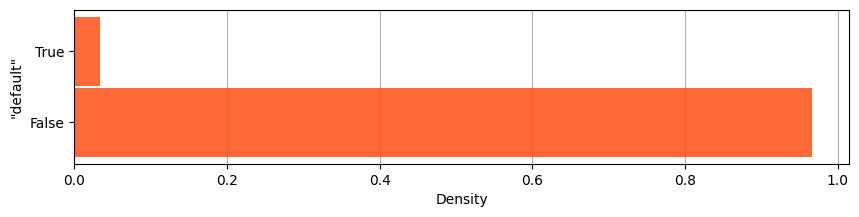

In [12]:
data.bar(['default'])

,count,percent
❌,7362,96.64
✅,256,3.36

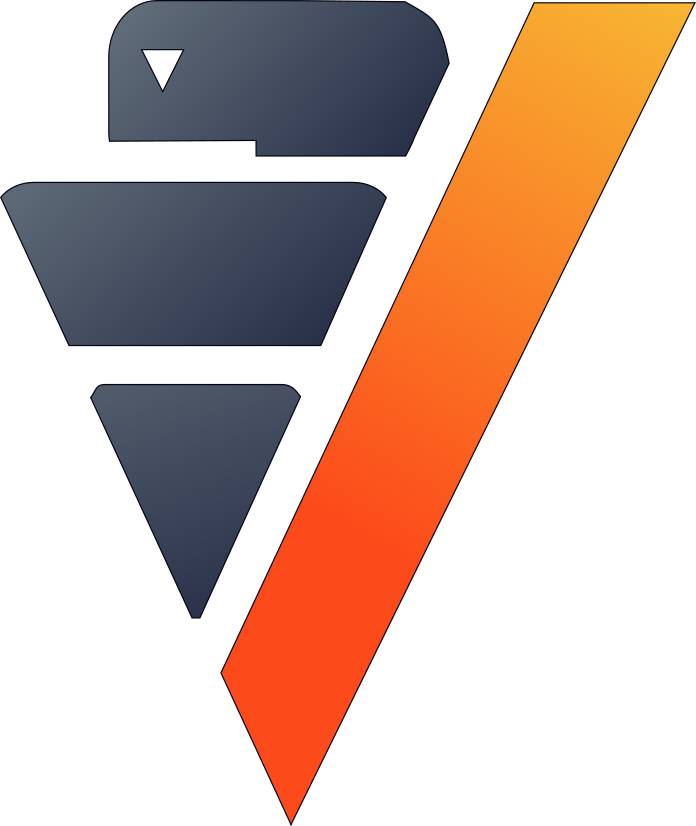

In [13]:
data["default"].topk()

One solution to this problem is to balance the data with `balance()` with the `under` method to allow more from the category with more data points (cases where the individual does not default), otherwise the dataset will only contain 256 values to train from.

You can tweak the ratio (x) to ensure that the defaulters are properly represented in the balanced dataset:

```python
balanced_data=data.balance(column="default",method="under",x=0.25)
balanced_data["default"].topk()
```

In [14]:
balanced_data=data.balance(column="default",method="under",x=0.25)

,count,percent
❌,1025,80.016
✅,256,19.984

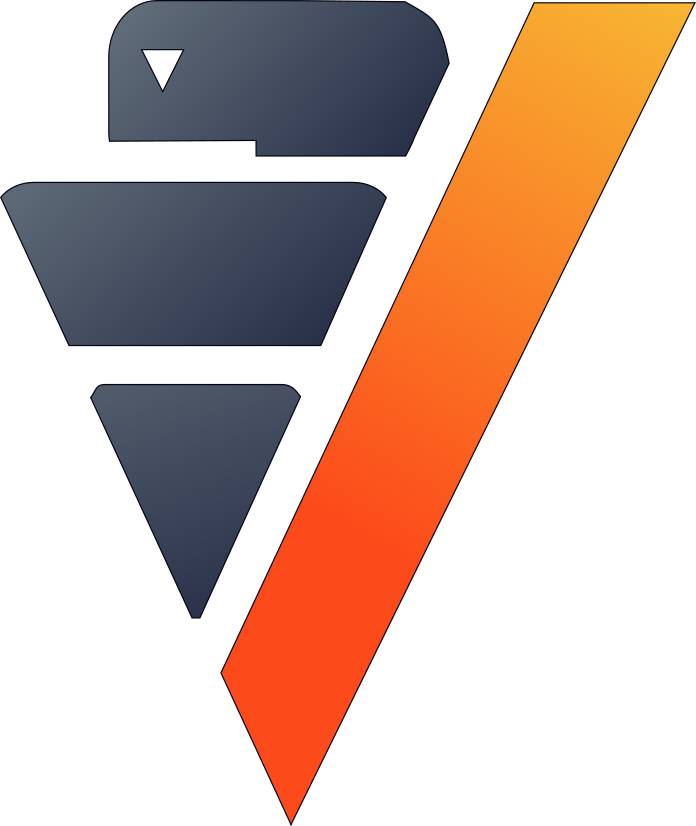

In [15]:
balanced_data["default"].topk()

Let us train again to see if we improved.

In [16]:
model.fit(balanced_data, ["credit_balance", "income","student"], "default")



details
  predictor   |coefficient|std_err | z_value |p_value 
--------------+-----------+--------+---------+--------
  Intercept   | -8.70948  | 0.71500|-12.18107| 0.00000
credit_balance|  0.00564  | 0.00037|15.31907 | 0.00000
    income    |  0.00000  | 0.00001| 0.06782 | 0.94593
   student    | -0.62317  | 0.35658|-1.74763 | 0.08053


regularization
type| lambda 
----+--------
none| 1.00000


call_string
logistic_reg('public.LR_default', '"public"."_verticapy_tmp_view_dbadmin_1960_1876393135_"', '"default"', '"credit_balance", "income", "student"'
USING PARAMETERS optimizer='newton', epsilon=1e-06, max_iterations=100, regularization='none', lambda=1, alpha=0.5, fit_intercept=true)

Additional Info
       Name       |Value
------------------+-----
 iteration_count  |  7  
rejected_row_count|  0  
accepted_row_count|1281 

In [17]:
print('Accuracy:',model.score(method="accuracy"))
print('AUC:',model.score(method="auc"))
print('Precision:',model.score(method="precision"))
print('Specificity:',model.score(method="specificity"))

Accuracy: 0.8985167837626854
AUC: 0.948944359756101
Precision: 0.7692307692307693
Specificity: 0.9473170731707317


The balanced dataset improved the model's precision at the cost of accuracy. There is always going to be a trade-off when working with imbalanced data.

***

<font style="font-family:Calibri"> Author Name: Umar Farooq Ghumman
<br>
Author Contact: umarfarooq.ghumman@vertica.com</font>